[*********************100%***********************]  1 of 1 completed


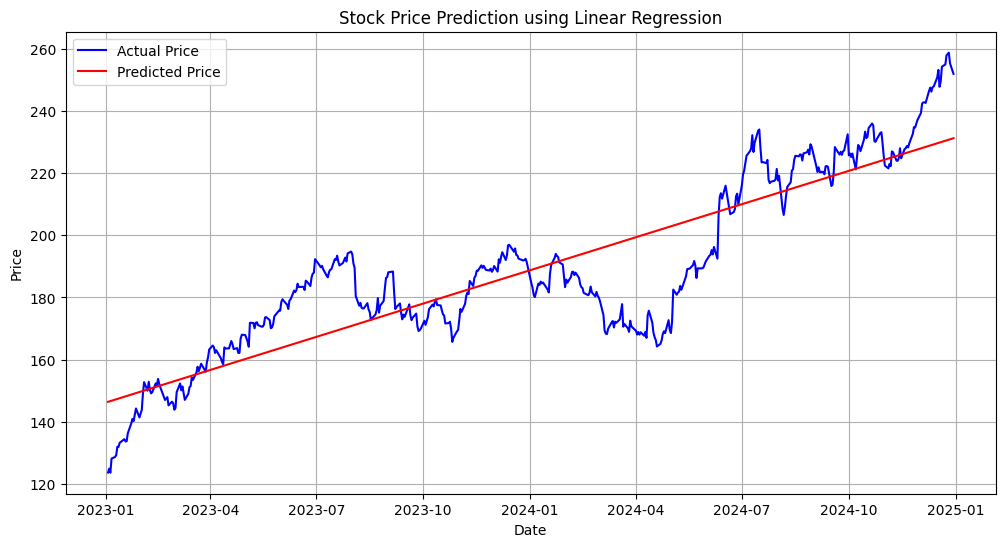

In [5]:
# 📦 Import necessary libraries
import yfinance as yf              # For downloading stock data from Yahoo Finance
import pandas as pd                # For handling and manipulating data
import matplotlib.pyplot as plt    # For plotting graphs
from sklearn.linear_model import LinearRegression  # For Linear Regression model

# 📥 Download stock data from Yahoo Finance
data = yf.download("AAPL", start="2023-01-01", end="2024-12-31")
# "AAPL" is the stock symbol for Apple Inc.
# Data includes Open, High, Low, Close, Volume, etc.

# 🔄 Reset index so 'Date' becomes a normal column
data = data.reset_index()

# 📅 Convert Date column to numerical format for regression
data['Date_ordinal'] = data['Date'].map(pd.Timestamp.toordinal)
# Linear Regression needs numeric input, not date format
# 'Date_ordinal' contains each date as a number (e.g., 2023-01-01 → 738520)

# 📊 Define input (X) and output (y) variables
X = data[['Date_ordinal']]    # Independent variable → Date in number form
y = data['Close']             # Dependent variable → Closing stock price

# 🧠 Create and train the Linear Regression model
model = LinearRegression()    # Create a Linear Regression model object
model.fit(X, y)               # Train model using X and y

# 📈 Predict closing prices using trained model
data['Predicted_Close'] = model.predict(X)
# Adds a new column with predicted prices for each date

# 📉 Plot Actual vs Predicted Prices
plt.figure(figsize=(12,6))    # Set figure size of the graph
plt.plot(data['Date'], data['Close'], label='Actual Price', color='blue')  # Plot real prices
plt.plot(data['Date'], data['Predicted_Close'], label='Predicted Price', color='red')  # Plot predicted prices
plt.title("Stock Price Prediction using Linear Regression")   # Graph title
plt.xlabel("Date")             # X-axis label
plt.ylabel("Price")            # Y-axis label
plt.legend()                   # Show legend for graph lines
plt.grid(True)                 # Show background grid
plt.show()                     # Display the graph
